# Divide bonds into credit rating class

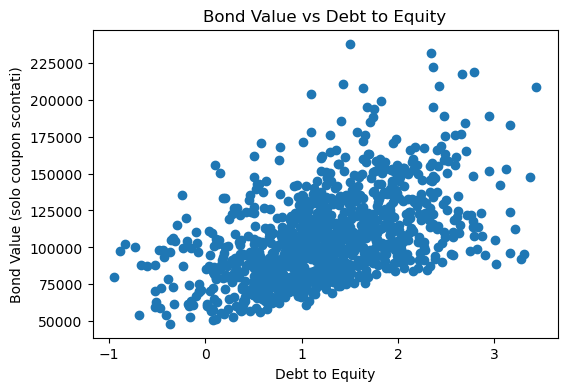

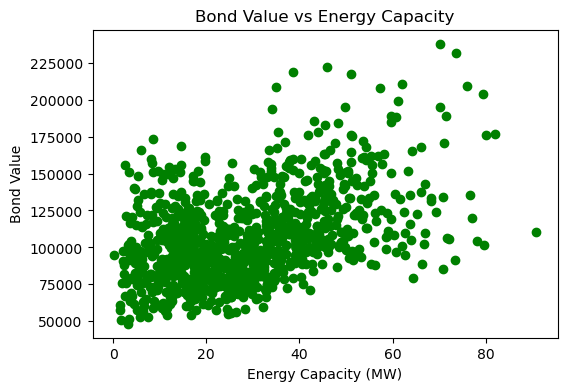

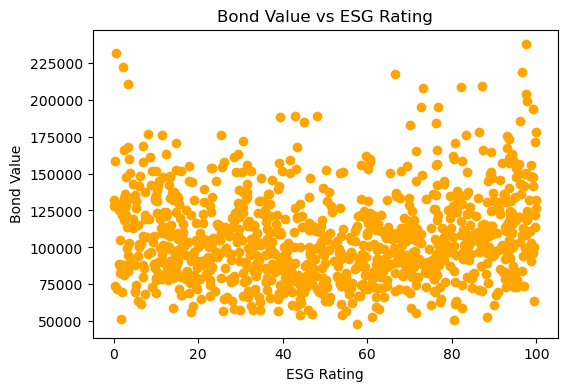

<Figure size 800x400 with 0 Axes>

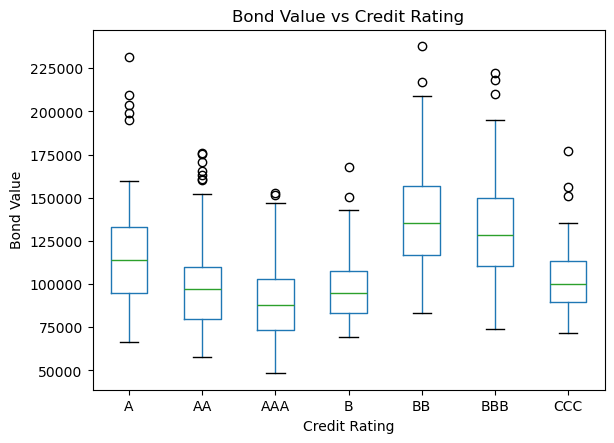

<Figure size 800x400 with 0 Axes>

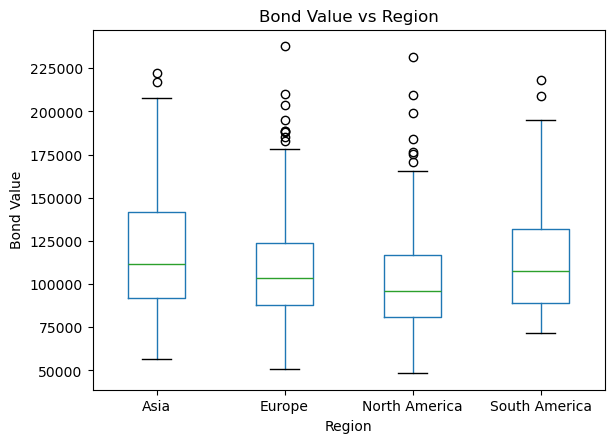

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('historical_bonds.csv')

r = 0.05 

df['bond_value'] = (
    df['cash_flow_1'] / (1 + r) ** 1 +
    df['cash_flow_2'] / (1 + r) ** 2 +
    df['cash_flow_3'] / (1 + r) ** 3
)

updated_file_path = "/Users/tommasomarrucci/Documents/GitHub/YALE/historical_bonds.csv"
df.to_csv(updated_file_path, index=False)


plt.figure(figsize=(6,4))
plt.scatter(df['debt_to_equity'], df['bond_value'])
plt.xlabel('Debt to Equity')
plt.ylabel('Bond Value (solo coupon scontati)')
plt.title('Bond Value vs Debt to Equity')
plt.show()

#Scatter plot di bond_value vs. energy_capacity
plt.figure(figsize=(6,4))
plt.scatter(df['energy_capacity'], df['bond_value'], c='green')
plt.xlabel('Energy Capacity (MW)')
plt.ylabel('Bond Value')
plt.title('Bond Value vs Energy Capacity')
plt.show()

#Scatter plot di bond_value vs esg_rating
plt.figure(figsize=(6,4))
plt.scatter(df['esg_rating'], df['bond_value'], c='orange')
plt.xlabel('ESG Rating')
plt.ylabel('Bond Value')
plt.title('Bond Value vs ESG Rating')
plt.show()

#Boxplot di bond_value raggruppato per credit_rating
plt.figure(figsize=(8,4))
df.boxplot(column='bond_value', by='credit_rating', grid=False)
plt.title('Bond Value vs Credit Rating')
plt.suptitle('')
plt.xlabel('Credit Rating')
plt.ylabel('Bond Value')
plt.show()

#Boxplot di bond_value raggruppato per region
plt.figure(figsize=(8,4))
df.boxplot(column='bond_value', by='region', grid=False)
plt.title('Bond Value vs Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Bond Value')
plt.show()


Colonne del DataFrame: ['Unnamed: 0', 'credit_rating', 'debt_to_equity', 'energy_capacity', 'esg_rating', 'region', 'cash_flow_1', 'cash_flow_2', 'cash_flow_3', 'bond_value']

Migliori parametri trovati dalla GridSearch:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Risultati sul Test Set:
R^2 Score: 0.9261
Mean Absolute Error (MAE): 6023.0555


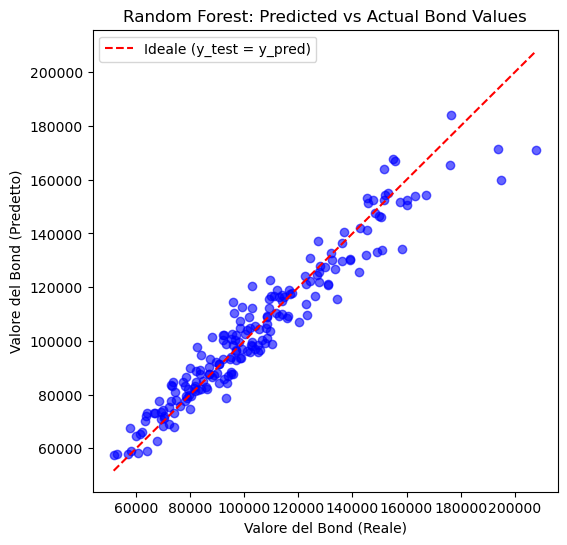

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

file_path = "/Users/tommasomarrucci/Documents/GitHub/YALE/historical_bonds.csv"
df = pd.read_csv(file_path)

print("Colonne del DataFrame:", df.columns.tolist())

r = 0.05 
df['bond_value'] = (
    df['cash_flow_1'] / (1 + r) ** 1 +
    df['cash_flow_2'] / (1 + r) ** 2 +
    df['cash_flow_3'] / (1 + r) ** 3
)

features = ['credit_rating', 'debt_to_equity', 'energy_capacity', 'region', 'esg_rating']
X = df[features]
y = df['bond_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_features = ['debt_to_equity', 'energy_capacity', 'esg_rating']
categorical_features = ['credit_rating', 'region']


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],   # Numero di alberi
    'max_depth': [5, 10],        # Profondità massima
    'min_samples_split': [2, 5], # Min campioni per split
    'min_samples_leaf': [1, 2]   # Min campioni in una foglia
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GridSearchCV(
        rf,
        param_grid,
        cv=5,            # K-Fold cross-validation
        scoring='r2',    # Criterio di valutazione
        n_jobs=-1        # Usa tutti i core disponibili
    ))
])

pipeline.fit(X_train, y_train)

grid_search = pipeline.named_steps['regressor']
best_model = grid_search.best_estimator_

print("\nMigliori parametri trovati dalla GridSearch:")
print(grid_search.best_params_)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nRisultati sul Test Set:")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red', label='Ideale (y_test = y_pred)')

plt.xlabel('Valore del Bond (Reale)')
plt.ylabel('Valore del Bond (Predetto)')
plt.title('Random Forest: Predicted vs Actual Bond Values')
plt.legend()
plt.show()

Colonne del dataset di simulazione: ['Unnamed: 0', 'credit_rating', 'debt_to_equity', 'energy_capacity', 'esg_rating', 'region']
Prime righe del dataset di simulazione:
   Unnamed: 0 credit_rating  debt_to_equity  energy_capacity  esg_rating  \
0        1000            BB        0.925015        49.981000   20.775856   
1        1001            AA        2.404028        29.555073   90.184009   
2        1002           BBB        2.008619         9.684890   94.957444   
3        1003           AAA        2.789894        20.601847   78.535606   
4        1004           CCC        0.448415        32.440513    4.152142   

          region  
0         Europe  
1  North America  
2  North America  
3         Europe  
4         Europe   

Prime righe con la colonna predicted_bond_value:
   Unnamed: 0 credit_rating  debt_to_equity  energy_capacity  esg_rating  \
0        1000            BB        0.925015        49.981000   20.775856   
1        1001            AA        2.404028        29.555

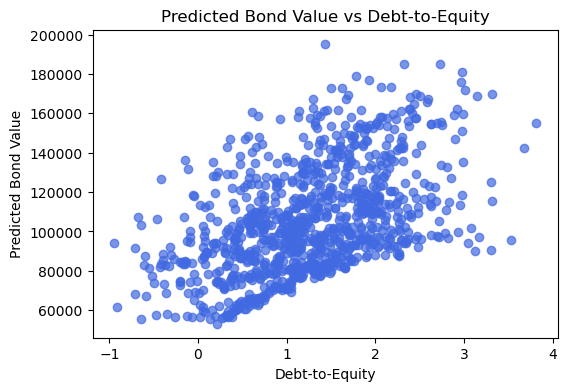

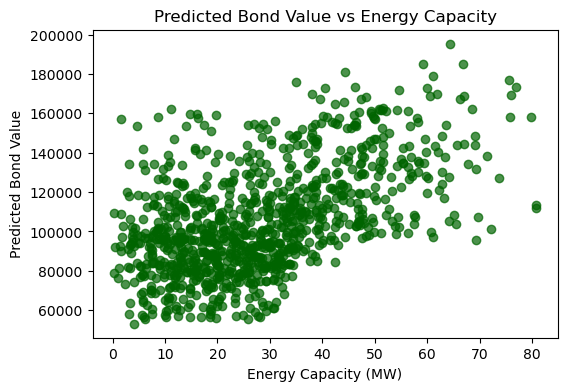

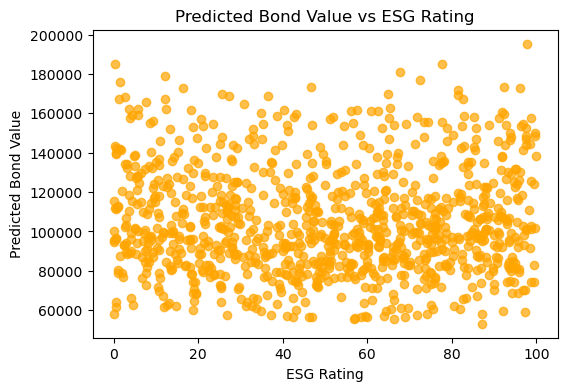

<Figure size 800x400 with 0 Axes>

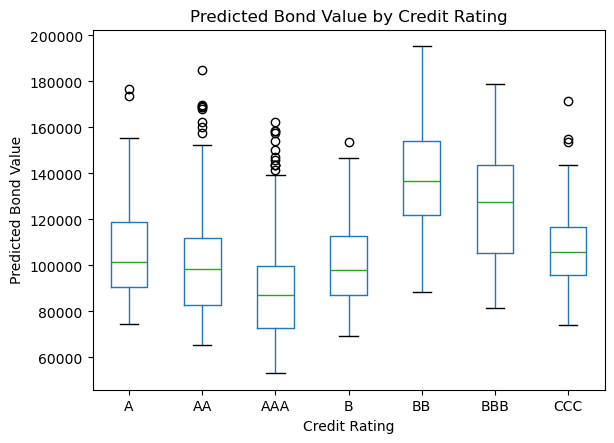

<Figure size 800x400 with 0 Axes>

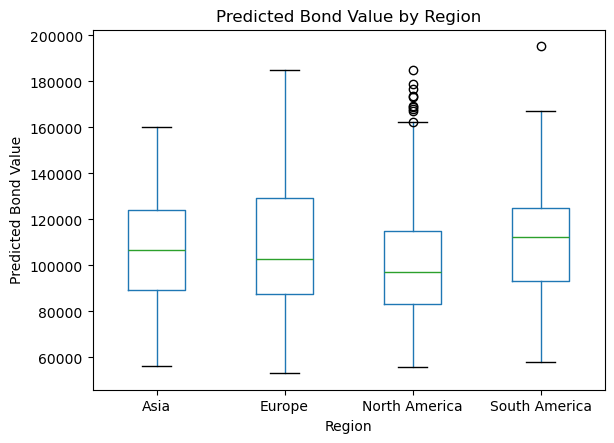

Analisi completata. Sono stati generati i plot e la colonna 'predicted_bond_value'.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

simulation_file_path = "/Users/tommasomarrucci/Documents/GitHub/YALE/simulation_bonds.csv"
df_sim = pd.read_csv(simulation_file_path)

print("Colonne del dataset di simulazione:", df_sim.columns.tolist())
print("Prime righe del dataset di simulazione:")
print(df_sim.head(), "\n")


features = ['credit_rating', 'debt_to_equity', 'energy_capacity', 'region', 'esg_rating']

df_sim['predicted_bond_value'] = pipeline.predict(df_sim[features])

print("Prime righe con la colonna predicted_bond_value:")
print(df_sim.head(), "\n")

plt.figure(figsize=(6,4))
plt.scatter(df_sim['debt_to_equity'], df_sim['predicted_bond_value'], alpha=0.7, color='royalblue')
plt.xlabel('Debt-to-Equity')
plt.ylabel('Predicted Bond Value')
plt.title('Predicted Bond Value vs Debt-to-Equity')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df_sim['energy_capacity'], df_sim['predicted_bond_value'], alpha=0.7, color='darkgreen')
plt.xlabel('Energy Capacity (MW)')
plt.ylabel('Predicted Bond Value')
plt.title('Predicted Bond Value vs Energy Capacity')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df_sim['esg_rating'], df_sim['predicted_bond_value'], alpha=0.7, color='orange')
plt.xlabel('ESG Rating')
plt.ylabel('Predicted Bond Value')
plt.title('Predicted Bond Value vs ESG Rating')
plt.show()

plt.figure(figsize=(8,4))
df_sim.boxplot(column='predicted_bond_value', by='credit_rating', grid=False)
plt.title('Predicted Bond Value by Credit Rating')
plt.suptitle('')
plt.xlabel('Credit Rating')
plt.ylabel('Predicted Bond Value')
plt.show()

plt.figure(figsize=(8,4))
df_sim.boxplot(column='predicted_bond_value', by='region', grid=False)
plt.title('Predicted Bond Value by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Predicted Bond Value')
plt.show()


print("Analisi completata. Sono stati generati i plot e la colonna 'predicted_bond_value'.")

Ecco i valori previsti (predicted_bond_value) per ogni bond nel file di simulazione:
credit_rating  debt_to_equity  energy_capacity        region  esg_rating  predicted_bond_value
           BB        0.925015        49.981000        Europe   20.775856         157285.578122
           AA        2.404028        29.555073 North America   90.184009         107154.932638
          BBB        2.008619         9.684890 North America   94.957444         131610.834393
          AAA        2.789894        20.601847        Europe   78.535606          98962.001100
          CCC        0.448415        32.440513        Europe    4.152142          90152.269560
          AAA        0.988138        18.191960          Asia   71.734563          70881.328734
          AAA        1.279191        31.962637        Europe   28.589912          88933.411467
          BBB       -0.422097        56.618338          Asia   16.364115         126674.155612
           AA        0.390404        38.087784        Europe

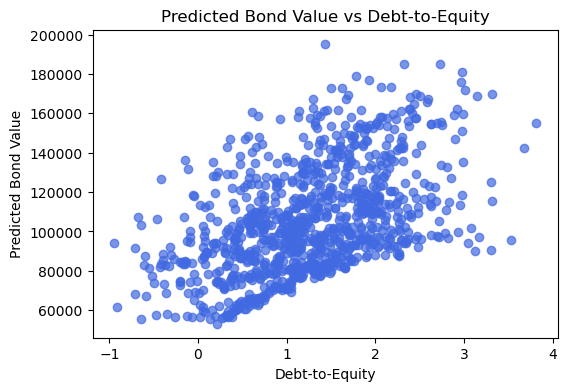

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

simulation_file_path = "/Users/tommasomarrucci/Documents/GitHub/YALE/simulation_bonds.csv"
df_sim = pd.read_csv(simulation_file_path)

features = ['credit_rating', 'debt_to_equity', 'energy_capacity', 'region', 'esg_rating']
df_sim['predicted_bond_value'] = pipeline.predict(df_sim[features])


print("Ecco i valori previsti (predicted_bond_value) per ogni bond nel file di simulazione:")
print(df_sim[['credit_rating', 'debt_to_equity', 'energy_capacity', 'region', 
              'esg_rating', 'predicted_bond_value']].to_string(index=False))


df_sim.to_csv("/Users/tommasomarrucci/Documents/GitHub/YALE/simulation_bonds_RF.csv", 
              index=False)

print("\nFile di simulazione con le previsioni salvato come 'simulation_bonds_with_predictions.csv'.")


plt.figure(figsize=(6,4))
plt.scatter(df_sim['debt_to_equity'], df_sim['predicted_bond_value'], alpha=0.7, color='royalblue')
plt.xlabel('Debt-to-Equity')
plt.ylabel('Predicted Bond Value')
plt.title('Predicted Bond Value vs Debt-to-Equity')
plt.show()